# [HW3] FBA QUANT - ASSET PRICING

Kim Na Young (dudskrla09@gmail.com)

---

# Assignment 1: Summary

### Week 3. Cash Flows

> Operating / Investing / Financing activities
- Operating activities (= income statement activities)
    - providing goods and services to customers
    - paying expenses related to generating revenues 
    - exclude these income statement items (1) depreciation and amortization (2) gains or losses on disposal of PP&E
- Investing activities 
    - acquisition or disposal of long-term assets 
- Financing activities 
    - related to owners or creditors
    - except for interest payments 

> Methods for preparing statement of cash flows

- Direct method 
    - used for investing and financing activities 
- Indirect method 
    - used for operating activities 
    - Goal : reconcile net income by removing noncash items from net income and including cash flows not in net income
    - adjusting expenses (add back) and revenues (subtract)

> Net Income VS. Net Cash from Operations
- Net Income
    - Did the company price their rentals and sales high enough to cover all the costs of the, running the business, and thus post a profit? 
    - pull all those future charges into present with an expense
- Net Cash from Operations
    - Did the company have more cash coming in than cash going out, in activities related to running the business? 
    - only show those future cash payments as they happen down the road

> Sales of PP&E -> get the true amount of economic depreciation 
- If we depreciate something too much -> a gain on sale 
- If we depreciate something too little -> a loss on sale

> EBITDA
- Earnings Before Interest, Taxes, Depreciation, and Amortization 
    - Earnings (EBITDA) -> predict future cash flow
    - Operating Cash Flow -> predict current cash flow 

> EBITDA VS. Net Cash from Operations
- takes out interest and taxes VS. includes cash taxes and cash interest 
- doesn't adjust for changes in working capital VS. adjusts for changes in working capital

### Week 4. Ratio Analysis

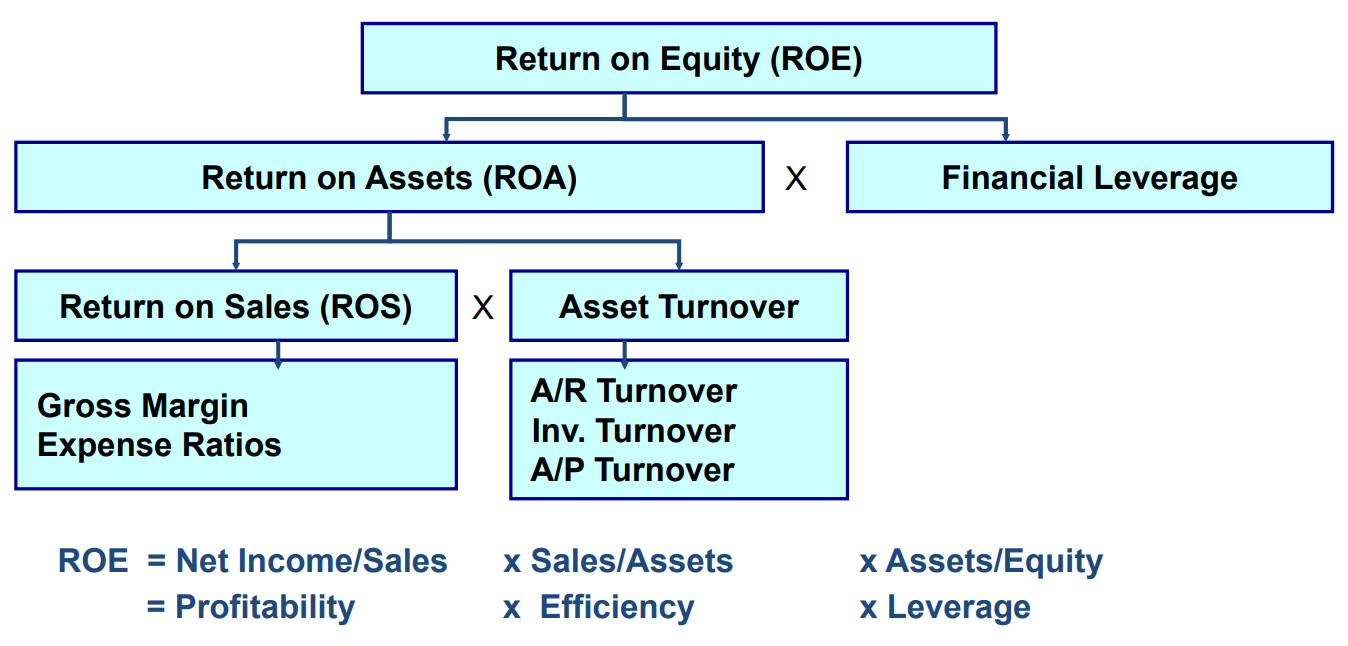

> Return on Equity

- Return on Assets (ROA)
    - How effectively do managers use company resources (assets) to generate profits?

- Financial leverage 
    - How much do the managers use debt to increase available assets for a given level of shareholder investment?

- Profitability 
    - How much profit does the company earn on each dollar of sales?

- Efficiency 
    - How much sales does the company generate based on its available resources?

> Common Size Financial Statements
- income statement 
    - take out the growth in sales
- balance sheet
    - remove the effect of the growth of assets 

> Profit Margin Ratios
- Gross Margin
    - markup of the selling price over cost
- SG&A to Sales 
    - how much operating expenses are as a percent of sales

> Days Outstanding Ratios (DSO)
- Net Trade Cycle 
    - the bigger Net Trade Cycle ↑ ∝ the more borrowing you have to do ↑

> Short-Term Liquidity Ratios
- Current Ratio
    - Do we have enough assets turning to cash to cover the liabilities that we have to meet in cash?
- Quick Ratio
    - Do you have enough assets that are either cash or gonna turn into cash very quickly to cover your current liabilities? 
- CFO to Current Liabilities 
    - Did you have enough cash generated from operations to cover your average level of current liabilities?

> Interest Coverage Ratios
- Interest Coverage
    - Is that operating income enough to cover what we have in interest expense?
- Cash Interest Coverage 
    - Is that cash from operating the business enough to cover the cash interest paid?

---

# Assignment 2: Making Problems

## [Q1]

A company put together a preliminary version of its financial statements. Its Net Income was $700, its Depreciation Expense was $100, and its Cash Flow from Operations was $190. The accountant found an error in computing straight-line Depreciation Expense. It should have been $70. What is Cash from Operations after fixing this mistake? (you can ignore taxes)

## [Q2]

Geller Florist Inc. had the following transactions during 2015: Purchased a $200,000 warehouse with $50,000 cash and a $150,000 mortgage from a bank. Raised $100,000 from selling new shares of stock to investors. The cash was used to buy land to grow tulips. Sold an old building for $50,000 (and suffered a loss on sale of $5,000) and used the cash to buy a new truck. What is the net impact of these transactions on Geller's Cash from Financing Activities during 2015?

## [Q3]

During 2015, ABC Inc. had EBITDA of $1200, Depreciation and Amortization Expense of $200, Interest Expense of $100, and Tax Expense of $50. What was ABC' Net Income in 2015? 

## [S1]

Net Income would increase by $30 with the smaller expense. The amount of depreciation expense added back would go down by $30. These would cancel each other out and there would be no effect on Cash from Operations. So, Cash from Operations would remain at **$190**.

=> The correction of a depreciation calculation error does not affect cash flow as the changes in net income and depreciation expense offset each other.

## [S2]

Transaction     | Cash      | Operating | Investing | Financing
---             | ---       | ---       | ---       | ---
Buy Building        | (50,000)  |           |  (200,000)   | 150,000
Sell Shares     | 100,000   |           |           | 100,000
Buy land   |  (100,000)  |           | (100,000)   |
Sell Building       |  50,000   |           | 50,000    |
Loss on sale    |  5,000  |           | 5,000   |
Buy truck       |  (50,000)   |           |  (50,000)    |

The answer is **$250,000**

## [S3]

Net Income = EBITDA - Depreciation and Amortization Expense - Interest Expense - Tax Expense

- EBITDA = $1200
- Depreciation and Amortization Expense = $200
- Interest Expense = $100
- Tax Expense = $50

Net Income = $1200 - $200 - $100 - $50
Net Income = $850

Therefore, ABC' Net Income in 2015 was **$850**

---

# Assignment 3: Implementing the codes in the textbook

### 1. Convert prices to returns

In [16]:
#1) Import libraries
import pandas as pd
import numpy as np
import yfinance as yf

# 2) Download the data and keep the adjusted close prices only
df = yf.download("AAPL",
    start="2010-01-01",
    end="2020-12-31",
    progress=False
    )

df = df.loc[:, ["Adj Close"]]

# 3) Calculate the simple and log returns using the adjusted close prices
df["simple_rtn"] = df["Adj Close"].pct_change()
df["log_rtn"] = np.log(df["Adj Close"]/df["Adj Close"].shift(1))

# 4) Inspect the output
df.head()

,Adj Close,simple_rtn,log_rtn
Date,,,
2010-01-04,6.487534,NaN,NaN
2010-01-05,6.498750,0.001729,0.001727
2010-01-06,6.395379,-0.015906,-0.016034
2010-01-07,6.383556,-0.001849,-0.001850
2010-01-08,6.425995,0.006648,0.006626


### 2. Adjusting the returns for inflation

In [17]:
# 1) Import libraries and authenticate
import pandas as pd
import nasdaqdatalink

nasdaqdatalink.ApiConfig.api_key = "YOUR_KEY_HERE"

# 2) Resample daily prices to monthly

################# 1. Convert prices to returns ################# 
df = yf.download("AAPL",
    start="2009-12-01",
    end="2020-12-31",
    progress=False
    )

df = df.loc[:, ["Adj Close"]]
################# 1. Convert prices to returns ################# 

df = df.resample("M").last()

# 3) Download inflation data from Nasdaq Data Link
df_cpi = ( 
nasdaqdatalink.get(
    dataset="RATEINF/CPI_USA",
    start_date="2009-12-01",
    end_date="2020-12-31")
.rename(columns={"Value": "cpi"})
)

df_cpi

,cpi
Date,
2009-12-31,215.949
2010-01-31,216.687
2010-02-28,216.741
2010-03-31,217.631
2010-04-30,218.009
...,...
2020-08-31,259.918
2020-09-30,260.280
2020-10-31,260.388


In [18]:
# 4) Join inflation data to prices
df = df.join(df_cpi, how="left")

# 5) Calculate simple returns and inflation rate
df["simple_rtn"] = df["Adj Close"].pct_change()
df["inflation_rate"] = df["cpi"].pct_change()

# 6) Adjust the returns for inflation and calculate the real returns
df["real rtn"]=(
    (df["simple_rtn"] + 1) / (df["inflation_rate"] + 1) - 1
)

df.head()

,Adj Close,cpi,simple_rtn,inflation_rate,real rtn
Date,,,,,
2009-12-31,6.388103,215.949,NaN,NaN,NaN
2010-01-31,5.822137,216.687,-0.088597,0.003417,-0.091701
2010-02-28,6.202884,216.741,0.065396,0.000249,0.065131
2010-03-31,7.123828,217.631,0.148470,0.004106,0.143774
2010-04-30,7.914727,218.009,0.111022,0.001737,0.109095


### 3. Changing the frequency of time series data

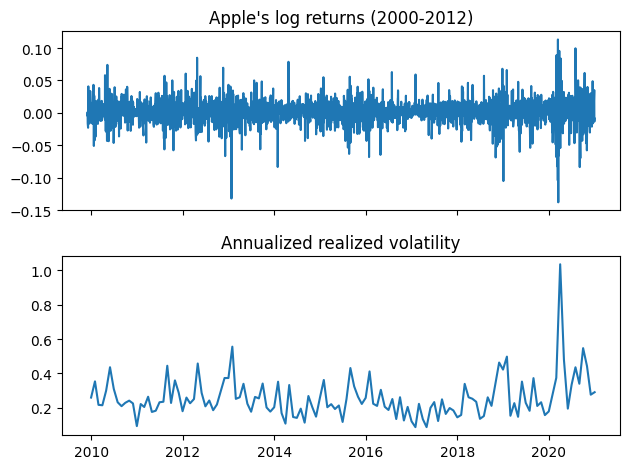

In [33]:
# 1) Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2) Define the function for calculating the realized volatility
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

################# 1. Convert prices to returns ################# 
df = yf.download("AAPL",
    start="2009-12-01",
    end="2020-12-31",
    progress=False
    )

df = df.loc[:, ["Adj Close"]]

df["log_rtn"] = np.log(df["Adj Close"]/df["Adj Close"].shift(1))
################# 1. Convert prices to returns ################# 

# 3) Calculate the monthly realized volatility
df_rv = (
    df.groupby(pd.Grouper(freq="M"))
    .apply(realized_volatility)
    .rename(columns={"log_rtn": "rv"})
)

# 4) Annualize the values
df_rv.rv = df_rv["rv"] * np.sqrt(12)

# 5) Plot the results
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df['log_rtn'])
ax[0].set_title("Apple's log returns (2000-2012)")
ax[1].plot(df_rv['rv'])
ax[1].set_title("Annualized realized volatility")

plt.tight_layout()
plt.show()

### 4. Different ways of imputing missing data

In [20]:
# 1) Import the libraries
import pandas as pd
import numpy as np
import nasdaqdatalink

# 2) Download the inflation data from Nasdaq Data Link
nasdaqdatalink.ApiConfig.api_key = "YOUR_KEY_HERE"

df = (
    nasdaqdatalink.get(dataset="RATEINF/CPI_USA",
    start_date="2015-01-01",
    end_date="2020-12-31")
    .rename(columns={"Value": "cpi"})
)

# 3) Introduce five missing values at random
np.random.seed(42)
rand_indices = np.random.choice(df.index, 5, replace=False)

df["cpi_missing"] = df.loc[:, "cpi"]
df.loc[rand_indices, "cpi_missing"] = np.nan
df.head()

,cpi,cpi_missing
Date,,
2015-01-31,233.707,NaN
2015-02-28,234.722,234.722
2015-03-31,236.119,236.119
2015-04-30,236.599,236.599
2015-05-31,237.805,NaN


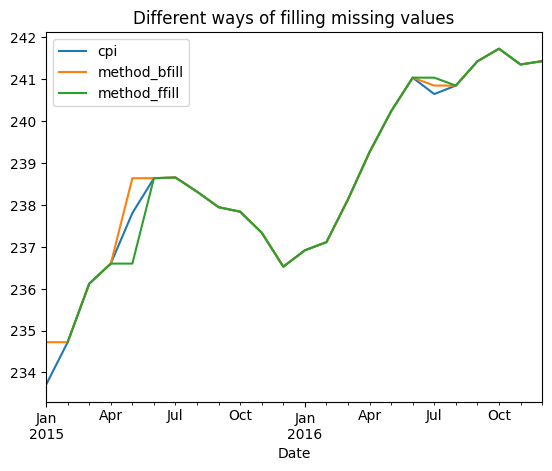

In [21]:
# 4) Fill in the missing values using different methods
for method in ["bfill", "ffill"]:
    df[f"method_{method}"] = (
        df[["cpi_missing"]].fillna(method=method)
    )

# 5) Inspect the results by displaying the rows in which we created the missing values
df.loc[rand_indices].sort_index()

# 6) Plot the results for the years 2015 to 2016
df.loc[:"2017-01-01"] \
.drop(columns=["cpi_missing"]) \
.plot(title="Different ways of filling missing values");

### 5. Converting currencies

In [22]:
# !pip install forex-python

# 1) Import the libraries
import pandas as pd
import yfinance as yf
from forex_python.converter import CurrencyRates

# 2) Download Apple's OHLC prices from January 2020
df= yf.download ("AAPL",
    start="2020-01-01",
    end="2020-01-31",
    progress=False
    )

df= df.drop(columns=["Adj Close", "Volume"])

# 3) Instantiate the CurrencyRates object
c = CurrencyRates()

# 4) Download the USD/EUR rate for each required date
df["usd_eur"] = [c.get_rate("USD", "EUR", date) for date in df.index]

# 5) Convert the prices in USD to EUR
for column in df.columns[:-1]:
    df[f"{column}_EUR"] = df[column] * df["usd_eur"]

df.head()


,Open,High,Low,Close,usd_eur,Open_EUR,High_EUR,Low_EUR,Close_EUR
Date,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,0.893416,66.166352,67.140178,65.931833,67.084340
2020-01-03,74.287498,75.144997,74.125000,74.357498,0.897102,66.643490,67.412754,66.497712,66.706287
2020-01-06,73.447502,74.989998,73.187500,74.949997,0.893336,65.613277,66.991243,65.381008,66.955509
2020-01-07,74.959999,75.224998,74.370003,74.597504,0.895095,67.096311,67.333511,66.568209,66.771844
2020-01-08,74.290001,76.110001,74.290001,75.797501,0.899685,66.837608,68.475034,66.837608,68.193883


### 6. Different ways of aggregating trade data

In [23]:
# !pip install python-binance
# !pip install binance-connector

#1) Import the libraries
from binance.spot import Spot as Client
import pandas as pd
import numpy as np

# 2) Instantiate the Binance client and download the last 500 BTCEUR trades
spot_client = Client(base_url="https://api3.binance.com")
r = spot_client.trades("BTCEUR")

# 3) Process the downloaded trades into a pandas DataFrame
df = (
    pd.DataFrame(r)
    .drop(columns=["isBuyerMaker", "isBestMatch"])
)

df["time"] = pd.to_datetime(df["time"], unit="ms")

for column in ["price", "qty", "quoteQty"]:
    df[column] = pd.to_numeric(df[column])

df

,id,price,qty,quoteQty,time
0,126781434,24784.48,0.07072,1752.758426,2023-08-18 14:42:07.291
1,126781435,24781.31,0.02109,522.637828,2023-08-18 14:42:09.948
2,126781436,24781.28,0.03000,743.438400,2023-08-18 14:42:09.948
3,126781437,24781.27,0.02235,553.861384,2023-08-18 14:42:09.948
4,126781438,24781.23,0.01360,337.024728,2023-08-18 14:42:09.948
...,...,...,...,...,...
495,126781929,24874.97,0.00500,124.374850,2023-08-18 14:51:53.662
496,126781930,24876.32,0.00100,24.876320,2023-08-18 14:51:53.662
497,126781931,24881.43,0.01003,249.560743,2023-08-18 14:51:53.662
498,126781932,24878.45,0.00211,52.493530,2023-08-18 14:51:59.047


In [24]:
# 4) Define a function aggregating the raw trades information into bars
def get_bars(df, add_time=False):
    ohlc = df["price"].ohlc()
    vwap = (df.apply(lambda x: np.average(x["price"], weights=x["qty"]))
    .to_frame("vwap")
    )

    vol = df["qty"].sum().to_frame("vol")
    cnt = df["qty"].size().to_frame("cnt")

    if add_time:
        time = df["time"].last().to_frame("time")
        res = pd.concat([time, ohlc, vwap, vol, cnt], axis=1)
    else:
        res = pd.concat([ohlc, vwap, vol, cnt], axis=1)
    return res

# 5) Get the time bars
df_grouped_time = df.groupby(
pd.Grouper(key="time", freq="1Min"))
time_bars = get_bars(df_grouped_time)
time_bars

,open,high,low,close,vwap,vol,cnt
time,,,,,,,
2023-08-18 14:42:00,24784.48,24796.90,24780.05,24796.90,24784.540712,0.61884,43
2023-08-18 14:43:00,24796.89,24796.89,24780.35,24781.57,24791.076421,0.71978,65
2023-08-18 14:44:00,24781.60,24800.19,24771.34,24800.19,24783.282110,0.95691,43
2023-08-18 14:45:00,24797.98,24800.17,24775.07,24775.07,24789.366391,0.60577,55
2023-08-18 14:46:00,24775.08,24790.71,24772.15,24790.71,24781.917450,0.55051,47
2023-08-18 14:47:00,24792.52,24803.99,24787.34,24794.24,24799.730555,0.59640,51
2023-08-18 14:48:00,24790.80,24812.32,24790.80,24800.40,24802.456500,0.41306,51
2023-08-18 14:49:00,24798.39,24815.46,24785.87,24813.19,24805.891144,0.41753,52
2023-08-18 14:50:00,24815.46,24852.01,24815.46,24847.53,24838.798056,0.63192,57


In [25]:
# 6) Get the tick bars
bar_size = 50
df["tick_group"]=(
pd.Series(list(range(len(df))))
.div(bar_size)
.apply(np.floor)
.astype(int)
.values
)
df_grouped_ticks = df.groupby("tick_group")
tick_bars = get_bars(df_grouped_ticks, add_time=True)
tick_bars

,time,open,high,low,close,vwap,vol,cnt
tick_group,,,,,,,,
0,2023-08-18 14:43:06.929,24784.48,24796.90,24780.05,24795.05,24786.124483,0.72332,50
1,2023-08-18 14:43:35.394,24795.05,24796.86,24780.35,24783.11,24793.480489,0.46450,50
2,2023-08-18 14:44:51.839,24781.59,24800.19,24771.34,24800.19,24782.754774,1.09738,50
3,2023-08-18 14:45:57.456,24800.19,24800.19,24780.00,24780.00,24790.395731,0.56923,50
4,2023-08-18 14:46:57.226,24780.00,24785.13,24772.15,24785.00,24781.092823,0.55387,50
5,2023-08-18 14:47:53.662,24785.00,24803.99,24785.00,24794.25,24799.573698,0.57561,50
6,2023-08-18 14:48:58.855,24794.24,24812.32,24790.80,24805.11,24801.405284,0.44038,50
7,2023-08-18 14:49:54.016,24800.74,24815.46,24785.87,24815.45,24803.359962,0.37077,50
8,2023-08-18 14:50:44.265,24815.45,24847.52,24813.18,24840.81,24835.157921,0.65789,50


In [26]:
# 7) Get the volume bars
bar_size = 1
df["cum_qty"] = df["qty"].cumsum()
df["vol_group"] = (
df["cum_qty"]
.div(bar_size)
.apply(np.floor)
.astype(int)
.values
)
df_grouped_ticks = df.groupby("vol_group")
volume_bars = get_bars(df_grouped_ticks, add_time=True)
volume_bars

,time,open,high,low,close,vwap,vol,cnt
vol_group,,,,,,,,
0,2023-08-18 14:43:30.402,24784.48,24796.90,24780.05,24795.08,24788.370453,0.97902,78
1,2023-08-18 14:44:24.507,24794.88,24795.08,24771.34,24780.37,24783.005622,1.00858,57
2,2023-08-18 14:46:18.931,24780.36,24800.19,24772.15,24780.76,24787.742672,1.00836,88
3,2023-08-18 14:47:59.937,24780.76,24803.99,24780.76,24794.24,24792.629230,0.99188,80
4,2023-08-18 14:50:38.907,24794.24,24847.52,24785.87,24838.33,24805.567618,0.97022,128
5,2023-08-18 14:51:59.457,24838.32,24881.43,24838.32,24878.46,24851.047016,1.01576,69


In [27]:
# 8) Get the dollar bars
bar_size =50000
df["cum_value"] = df["quoteQty"].cumsum()
df["value_group"]=(
df["cum_value"]
.div(bar_size)
.apply(np.floor)
.astype(int)
.values
)
df_grouped_ticks = df.groupby("value_group")
dollar_bars = get_bars(df_grouped_ticks, add_time=True)
dollar_bars

,time,open,high,low,close,vwap,vol,cnt
value_group,,,,,,,,
0,2023-08-18 14:44:27.596,24784.48,24796.90,24771.34,24781.25,24785.584667,2.01260,137
1,2023-08-18 14:47:59.937,24786.20,24803.99,24772.15,24794.24,24790.287677,1.97524,166
2,2023-08-18 14:51:59.457,24794.24,24881.43,24785.87,24878.46,24828.828755,1.98598,197
